In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.tree import export_graphviz
import graphviz
from sklearn.metrics import log_loss
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn import metrics
from sklearn import tree



# **LOADING PROCESSED DATASET**

In [2]:
# Loading the dataset
df = pd.read_csv('https://raw.githubusercontent.com/nhanna1219/Closely_Customer_Classification/main/Preprocessed_Data.csv', sep=',')
print("Number of datapoints:", len(df))
df.head()

Number of datapoints: 2213


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,Loyalty_Score,Is_Loyal
0,5.368107,-1.804778,-1.078759,-0.646435,-3.097021,0.337949,0.007753,0.821314,-0.411286,0.355576,...,0.493904,0.814431,-0.774570,0.656888,0.502650,0.688828,-1.420569,0.749187,0.405501,True
1,-3.491633,0.502507,-0.427520,-0.183056,0.859958,-0.916708,2.148626,0.386522,-0.610815,1.025348,...,0.453972,-0.146679,0.185969,0.007899,-0.298426,-0.227511,-0.257056,0.167572,0.190314,False
2,2.018019,-1.291695,-1.182698,-1.128659,0.603602,-0.583301,-0.137928,-0.128718,-0.429963,0.473263,...,-1.240771,0.170181,-0.554964,-0.661380,0.382996,0.297692,0.214487,-0.410894,0.380150,True
3,-3.286131,0.555640,-0.593547,-0.890906,0.937647,0.370995,-0.325239,0.343596,-0.994986,-0.007917,...,-0.242170,0.251216,-0.071301,-0.027513,0.068979,0.056725,-0.360599,-0.198887,0.234560,False
4,-0.585539,-1.463671,0.526403,2.031741,0.218226,0.454320,-0.106105,-0.749205,0.098400,-0.308995,...,0.156086,0.973668,-0.445877,0.238192,0.781415,-0.038416,-0.242535,-0.114447,0.161950,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2213 entries, 0 to 2212
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PC1            2213 non-null   float64
 1   PC2            2213 non-null   float64
 2   PC3            2213 non-null   float64
 3   PC4            2213 non-null   float64
 4   PC5            2213 non-null   float64
 5   PC6            2213 non-null   float64
 6   PC7            2213 non-null   float64
 7   PC8            2213 non-null   float64
 8   PC9            2213 non-null   float64
 9   PC10           2213 non-null   float64
 10  PC11           2213 non-null   float64
 11  PC12           2213 non-null   float64
 12  PC13           2213 non-null   float64
 13  PC14           2213 non-null   float64
 14  PC15           2213 non-null   float64
 15  PC16           2213 non-null   float64
 16  PC17           2213 non-null   float64
 17  PC18           2213 non-null   float64
 18  PC19    

In [4]:
# Change "True" "False" label to 1, 0 respectively
df['Is_Loyal'] = df['Is_Loyal'].astype(int)

# Splitting the dataset into features and target variable
X = df.drop(['Loyalty_Score','Is_Loyal'], axis=1)
y = df['Is_Loyal']

In [5]:
def draw_cm( y_test,y_pred_dt):
    cm = metrics.confusion_matrix( y_test,y_pred_dt )
    plt.figure(figsize=(8,8))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["False", "True"] , yticklabels = ["False", "True"] , cmap="Greens")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# **8-1-1 DATASET**

>## ***1. Integrated use of GridSearch and RamdomSearch to optimize parameters for Decision trees***

In [6]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_validate, y_test, y_validate = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
# Hiển thị kích thước của các tập dữ liệu
print("Training set size:", len(X_train))
print("Validation set size:", len(X_validate))
print("Test set size:", len(X_test))

Training set size: 1770
Validation set size: 222
Test set size: 221


In [7]:
# def tune_decision_tree(x_train, y_train):
#     params = {
        
#         'criterion':['gini','entropy'],
#         'splitter':['best','random'],
#         'max_depth':range(1,10),
#         'max_leaf_nodes':range(2,10,1),
#         'max_features':['auto','log2']
        
#     }

#     dt = DecisionTreeClassifier()

#     _search = RandomizedSearchCV(estimator=dt,n_jobs=-1,cv=3,param_distributions=params,scoring='recall')
#     _search.fit(X,y)
#     return _search
def tune_decision_tree(x_train, y_train):
    params = {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }


# Sử dụng GridSearchCV để tìm các tham số tối ưu
    dt = DecisionTreeClassifier()   
    _search = GridSearchCV(estimator=dt, param_grid=params, scoring='neg_log_loss', cv=5)
    _search.fit(x_train, y_train)
    return _search

# def tune_decision_tree(x_train, y_train):
#     params = {
#         'criterion':['gini','entropy'],
#         'splitter':['best','random'],
#         'max_depth': [None, 10, 20, 30],
#         'min_samples_split': [2, 5, 10],
#         'min_samples_leaf': [1, 2, 4],
#         'max_leaf_nodes':range(2,10,1),
#         'max_features':['auto','log2']    
#     }


#     dt = DecisionTreeClassifier()
#     random_search = RandomizedSearchCV(estimator=dt, param_distributions=params, scoring='neg_log_loss', cv=5)
#     random_search.fit(x_train, y_train)

#     grid_param_grid = {
#         'criterion': [random_search.best_params_['criterion']],
#         'splitter': [random_search.best_params_['splitter']],
#         'max_depth': [random_search.best_params_['max_depth']] + list([None, 10, 20, 30]),
#         'min_samples_split': [random_search.best_params_['min_samples_split']] + list([2, 5, 10]),
#         'min_samples_leaf': [random_search.best_params_['min_samples_leaf']] + list([1, 2, 4]),
#         'max_leaf_nodes': [random_search.best_params_['max_leaf_nodes']] + list(range(2, 10, 1)),
#         'max_features': [random_search.best_params_['max_features']]
#     }

#     dt = DecisionTreeClassifier()   
#     _search = GridSearchCV(estimator=dt, param_grid=grid_param_grid, scoring='neg_log_loss', cv=5)
#     _search.fit(x_train, y_train)
#     return _search




>## ***2. Train model with parameters has been optimized trees***

In [39]:
_search = tune_decision_tree(X_train, y_train)
dt = DecisionTreeClassifier(**_search.best_params_)
dt.fit(X_train,y_train)
# dt.fit(pd.concat([X_train, X_test]), pd.concat([y_train, y_test]))


DecisionTreeClassifier(max_depth=20, min_samples_leaf=4, min_samples_split=5)

In [40]:
# Đánh giá mô hình trên tập kiểm định
predictions_validate = dt.predict(X_validate)
accuracy_validate = accuracy_score(y_validate, predictions_validate)
print(f"Accuracy on Validation Set: {accuracy_validate}")

Accuracy on Validation Set: 0.9369369369369369


In [41]:
# Đánh giá mô hình trên tập kiểm thử
predictions_test = dt.predict(X_test)
accuracy_test = accuracy_score(y_test, predictions_test)
print(f"Accuracy on Test Set: {accuracy_test}")

Accuracy on Test Set: 0.9728506787330317


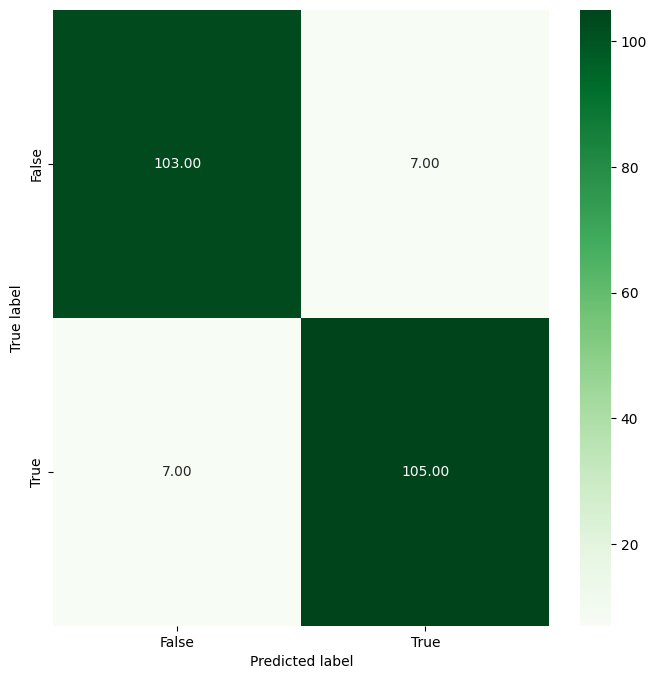

In [42]:
draw_cm(y_validate, predictions_validate)

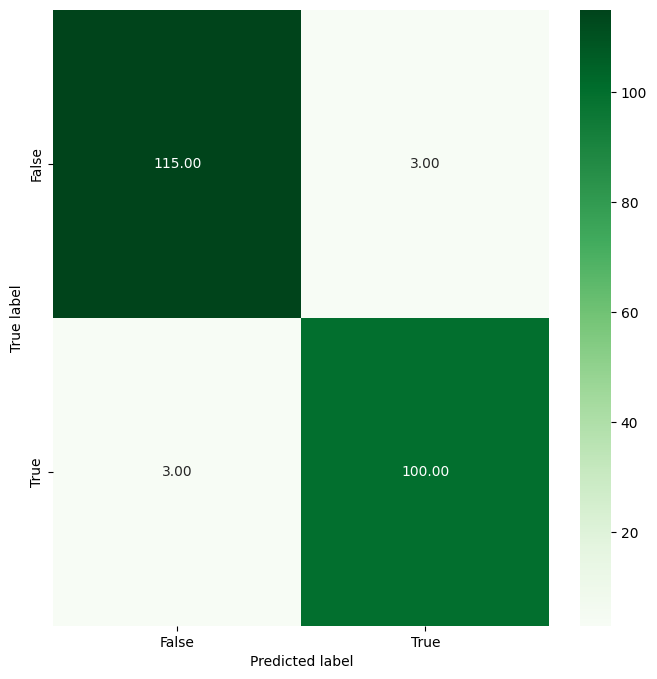

In [43]:
draw_cm(y_test, predictions_test)


In [44]:
best_dt_model =_search.best_estimator_
y_pred_proba = best_dt_model.predict_proba(X_test)
print("Các tham số tối ưu:", _search.best_params_)
loss = log_loss(y_test, y_pred_proba)
print("Log Loss trên tập kiểm tra:", loss)


Các tham số tối ưu: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 5}
Log Loss trên tập kiểm tra: 1.3714181615778085


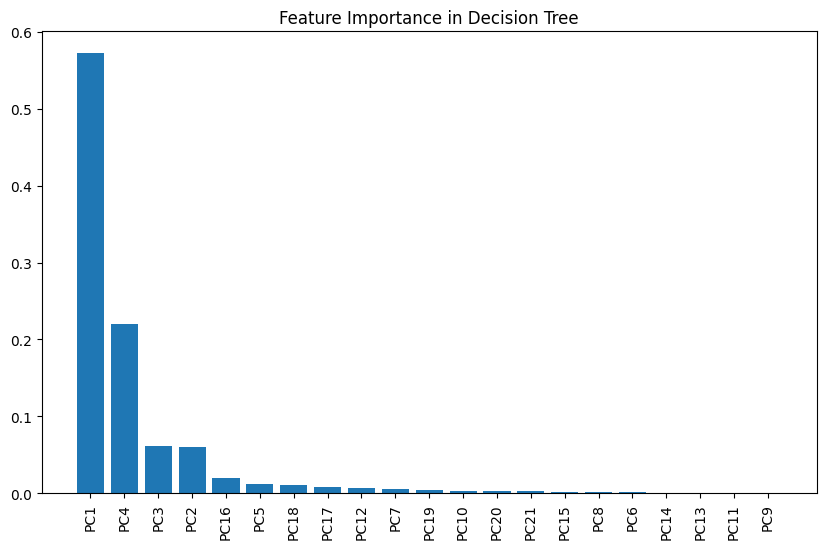

In [45]:
# Lấy độ quan trọng của đặc trưng từ toàn bộ Decision Tree
feature_importances = _search.best_estimator_.feature_importances_

# Lấy tên của các đặc trưng
feature_names = X_train.columns

# Sắp xếp độ quan trọng từ cao đến thấp
indices = feature_importances.argsort()[::-1]

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), feature_importances[indices])
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.title('Feature Importance in Decision Tree')
plt.show()

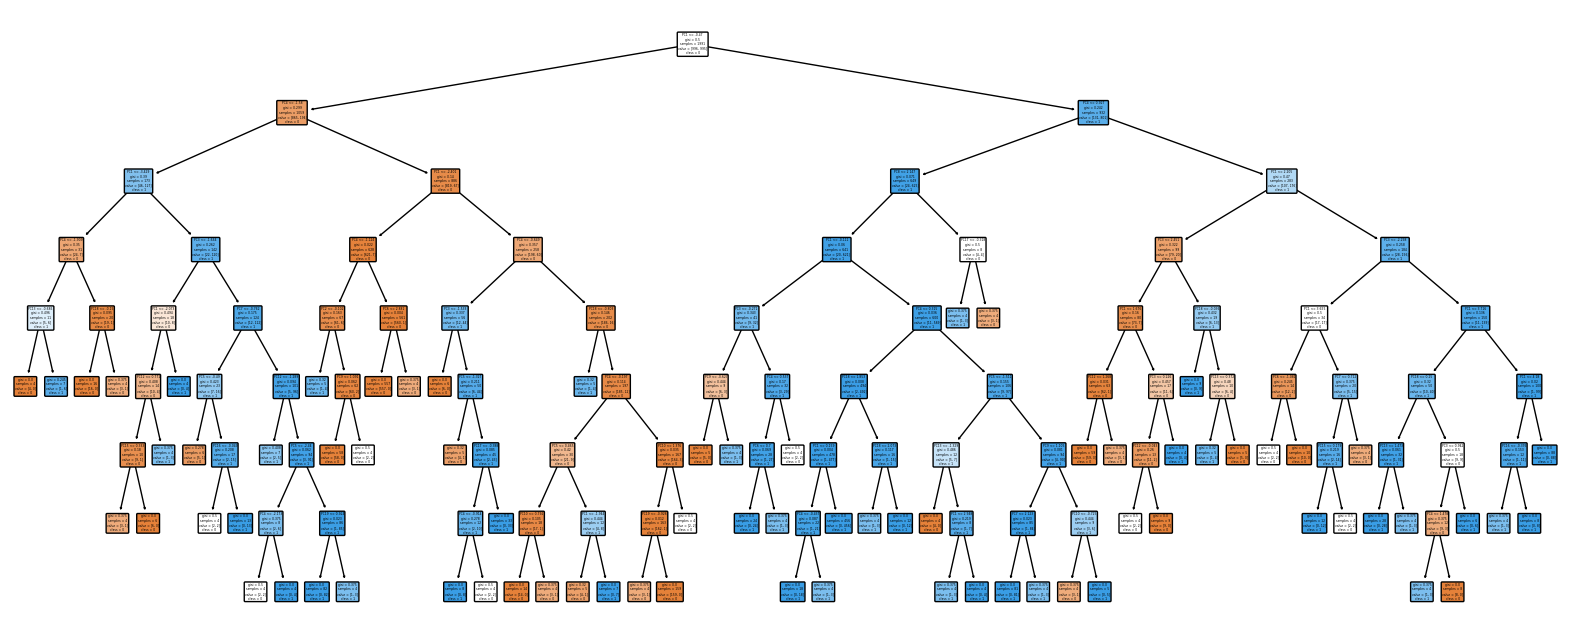

In [46]:
from sklearn.tree import plot_tree

# Vẽ biểu đồ của cây quyết định
plt.figure(figsize=(20, 8))
plot_tree(dt, feature_names=feature_names, filled=True, rounded=True, class_names=['0', '1'])
plt.show()


>## ***3. Evaluate Model***

In [47]:
print ('Report val set : ')
print (classification_report(y_validate, predictions_validate))

Report val set : 
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       110
           1       0.94      0.94      0.94       112

    accuracy                           0.94       222
   macro avg       0.94      0.94      0.94       222
weighted avg       0.94      0.94      0.94       222



In [48]:
print ('Report test set : ')
print (classification_report(y_test,predictions_test))

Report test set : 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       118
           1       0.97      0.97      0.97       103

    accuracy                           0.97       221
   macro avg       0.97      0.97      0.97       221
weighted avg       0.97      0.97      0.97       221



In [49]:
import pickle
filename = "DecisionTree811.pickle"

In [50]:
pickle.dump(dt, open(filename, "wb"))

In [51]:
d_tree_811_model = pickle.load(open(filename, "rb"))

# **7-2-1 DATASET**

>## ***1. Integrated use of GridSearch and RamdomSearch to optimize parameters for Decision trees***

In [52]:
X_train1, X_temp1, y_train1, y_temp1 = train_test_split(X, y, test_size=0.3, random_state=42)
X_test1, X_validate1, y_test1, y_validate1 = train_test_split(X_temp1, y_temp1, test_size=2/3, random_state=42)
# Hiển thị kích thước của các tập dữ liệu
print("Training set size:", len(X_train1))
print("Validation set size:", len(X_validate1))
print("Test set size:", len(X_test1))

Training set size: 1549
Validation set size: 443
Test set size: 221


In [53]:
_search1 = tune_decision_tree(X_train1, y_train1)

>## ***2. Train model with parameters has been optimized trees***

In [55]:
dt1 = DecisionTreeClassifier(**_search1.best_params_)
dt1.fit(X_train1,y_train1)
# dt1.fit(pd.concat([X_train1, X_test1]), pd.concat([y_train1, y_test1]))

DecisionTreeClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10)

In [56]:
# Đánh giá mô hình trên tập kiểm định
predictions_validate1 = dt.predict(X_validate1)
accuracy_validate1 = accuracy_score(y_validate1, predictions_validate1)
print(f"Accuracy on Validation Set: {accuracy_validate1}")

Accuracy on Validation Set: 0.9548532731376975


In [57]:
# Đánh giá mô hình trên tập kiểm thử
predictions_test1 = dt.predict(X_test1)
accuracy_test1 = accuracy_score(y_test1, predictions_test1)
print(f"Accuracy on Test Set: {accuracy_test1}")

Accuracy on Test Set: 0.9819004524886877


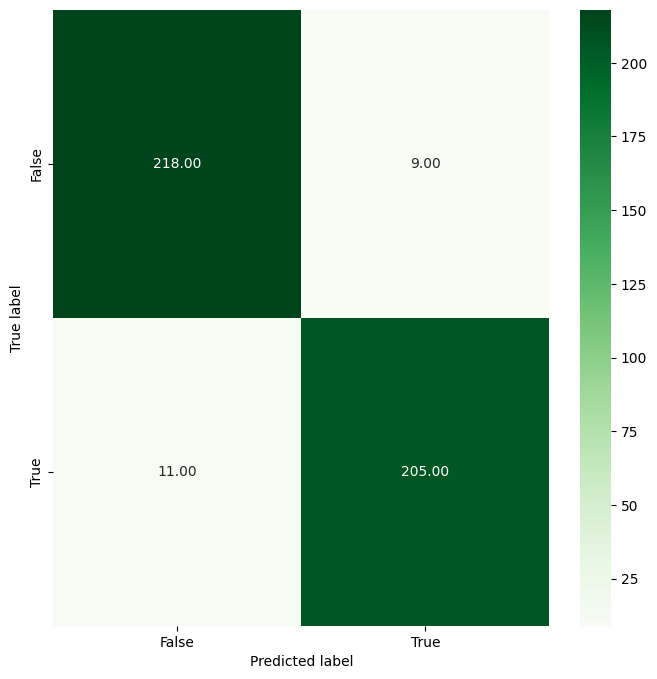

In [58]:
draw_cm(y_validate1, predictions_validate1)

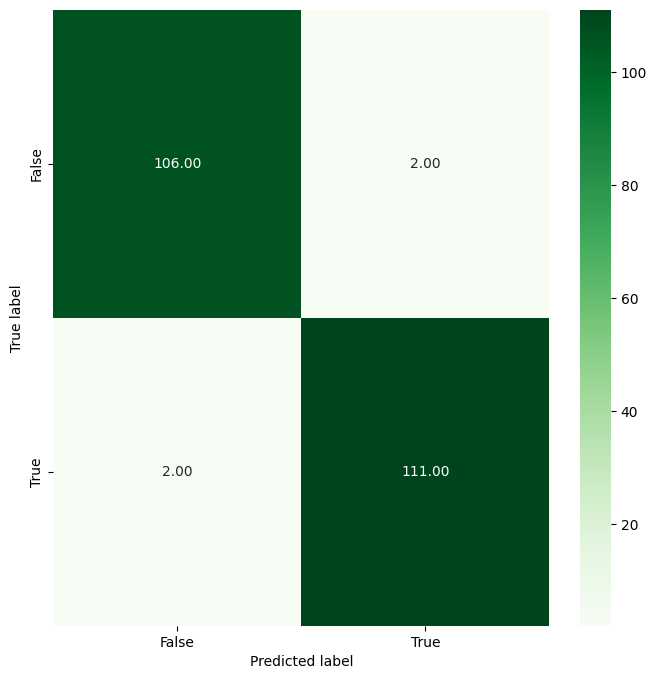

In [59]:
draw_cm(y_test1, predictions_test1)

In [60]:
best_dt_model1 =_search1.best_estimator_
y_pred_proba1 = best_dt_model1.predict_proba(X_test1)
print("Các tham số tối ưu:", _search1.best_params_)
loss1 = log_loss(y_test1, y_pred_proba1)
print("Log Loss trên tập kiểm tra:", loss1)

Các tham số tối ưu: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Log Loss trên tập kiểm tra: 0.8768174281175791


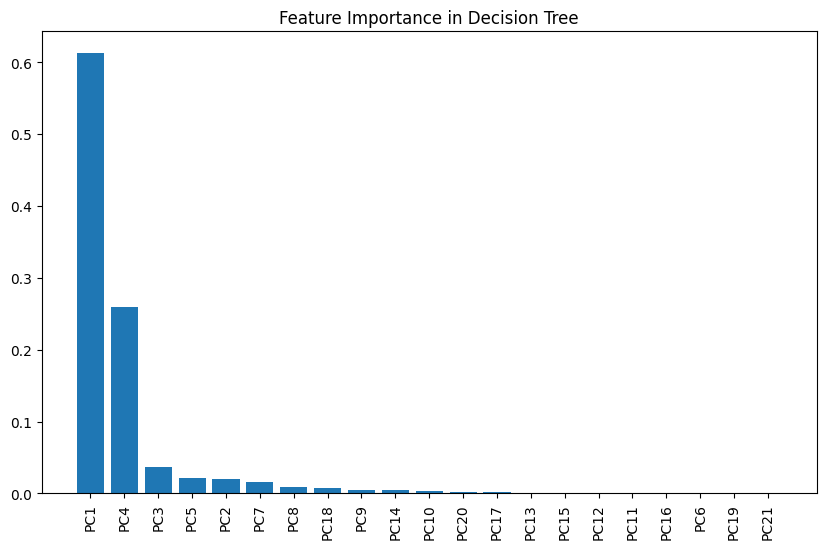

In [61]:
# Lấy độ quan trọng của đặc trưng từ toàn bộ Decision Tree
feature_importances = _search1.best_estimator_.feature_importances_

# Lấy tên của các đặc trưng
feature_names = X_train1.columns

# Sắp xếp độ quan trọng từ cao đến thấp
indices1 = feature_importances.argsort()[::-1]

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
plt.bar(range(X_train1.shape[1]), feature_importances[indices1])
plt.xticks(range(X_train1.shape[1]), feature_names[indices1], rotation=90)
plt.title('Feature Importance in Decision Tree')
plt.show()

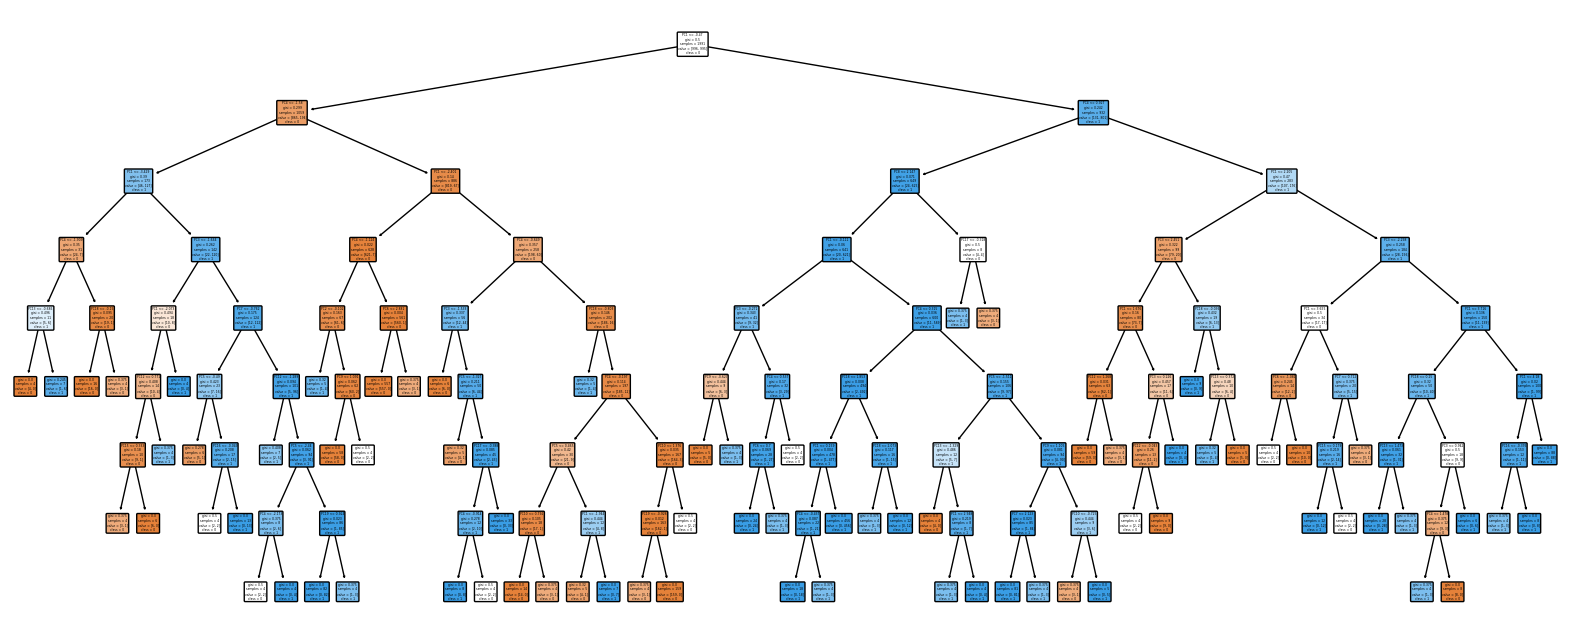

In [62]:
from sklearn.tree import plot_tree

# Vẽ biểu đồ của cây quyết định
plt.figure(figsize=(20, 8))
plot_tree(dt, feature_names=feature_names, filled=True, rounded=True, class_names=['0', '1'])
plt.show()

>## ***3. Evaluate Model***

In [63]:
print ('Report validate : ')
print (classification_report(y_validate1, predictions_validate1))

Report validate : 
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       227
           1       0.96      0.95      0.95       216

    accuracy                           0.95       443
   macro avg       0.95      0.95      0.95       443
weighted avg       0.95      0.95      0.95       443



In [64]:
print ('Report test set : ')
print (classification_report(y_test1,predictions_test1))

Report test set : 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       108
           1       0.98      0.98      0.98       113

    accuracy                           0.98       221
   macro avg       0.98      0.98      0.98       221
weighted avg       0.98      0.98      0.98       221



In [65]:
import pickle
filename1 = "Decisiontree721.pickle"

In [66]:
pickle.dump(dt1, open(filename1, "wb"))

In [67]:
d_tree_721_model = pickle.load(open(filename1, "rb"))

# **TEST 2 MODEL (8-2, 7-3) ON FAKE DATASET**

In [68]:
# Read Fake Data
fake_df = pd.read_csv('https://raw.githubusercontent.com/nhanna1219/Closely_Customer_Classification/main/PCA_Fake_Data.csv', sep=",")

# Change "True" "False" label to 1, 0 respectively
fake_df['Is_Loyal'] = fake_df['Is_Loyal'].astype(int)

Xf_test = fake_df.drop(['Loyalty_Score','Is_Loyal'], axis=1)
yf_test = fake_df['Is_Loyal']

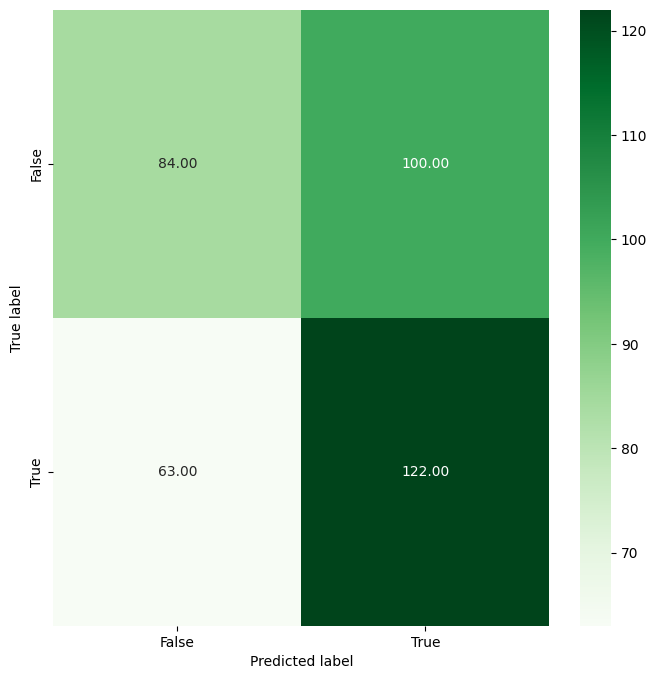

Accuracy Score : 0.5582655826558266
Report : 
              precision    recall  f1-score   support

           0       0.57      0.46      0.51       184
           1       0.55      0.66      0.60       185

    accuracy                           0.56       369
   macro avg       0.56      0.56      0.55       369
weighted avg       0.56      0.56      0.55       369



In [69]:
yf_pred_dt = dt.predict(Xf_test)
draw_cm(yf_test, yf_pred_dt )
print ('Accuracy Score :',accuracy_score(yf_test, yf_pred_dt) )
print ('Report : ')
print (classification_report(yf_test, yf_pred_dt))

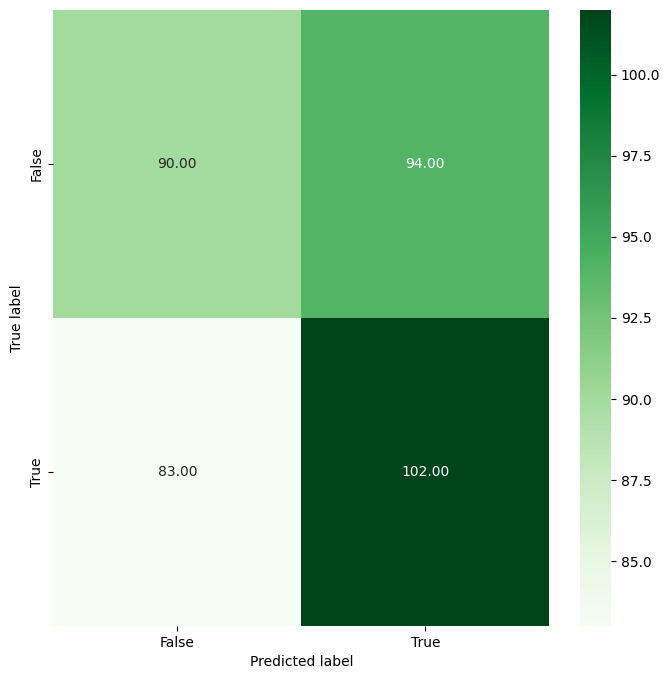

Accuracy Score : 0.5203252032520326
Report : 
              precision    recall  f1-score   support

           0       0.52      0.49      0.50       184
           1       0.52      0.55      0.54       185

    accuracy                           0.52       369
   macro avg       0.52      0.52      0.52       369
weighted avg       0.52      0.52      0.52       369



In [70]:
yf_pred_dt1 = dt1.predict(Xf_test)
draw_cm(yf_test, yf_pred_dt1 )
print ('Accuracy Score :',accuracy_score(yf_test, yf_pred_dt1) )
print ('Report : ')
print (classification_report(yf_test, yf_pred_dt1))